# Data
This data contains information about products sold at the (now bankrupt) retail chain Bed, Bath & Beyond. Each top level category is broken down into several un-named items, each with some value that represents the number links on the BBB website associated with that sub-category.
 This data comes from the following article, with their visualization of the data below:
- How big was the 'beyond' section at Bed, Bath & Beyond? The iconic retailer's weirdest merchandise, CNN, https://www.cnn.com/2023/04/26/business/bed-bath-beyond-merchandise-dg/index.html

# Packed Circle Chart
Use Matplotlib and the circlify package to create a packed circle chart of the bbb. csv data, like in the example below.

![example_1](images/example_1.png)

As with the tree map, the area of each circle is proportional to the quantitative value associated with that item. Items within a category are arranged to pack tightly within an inscribing circle. In a sense, this is like a tree map but built using circles instead of rectangles. (Though representing the hierarchy can be difficult as the interior may not maximally fill their inscribing circle.)

Make sure that the colours of the items within a category and the enclosing circles are correct, and the category is labelled in the middle of the enclosing circle (we will improve this on the next iteration).


In [1]:
%pip install circlify

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\HP OMEN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Import libraries
import circlify as circ
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint as pp

In [3]:
# Load the bbb.csv dataset
data = pd.read_csv('bbb.csv')

# Extract top-level categories and their total values, and sort by value in descending order
top_categories = data.groupby('category')['value'].sum().reset_index()
top_categories = top_categories.sort_values(by='value', ascending=False)
top_categories=top_categories.reset_index()
top_categories=top_categories.iloc[:,1:]
top_categories

,category,value
0,Kitchen,1063.7
1,Home decor,979.5
2,Furniture,940.6
3,Bath,813.7
4,Health and beauty,808.4
5,Outdoor,781.4
6,Dining,730.4
7,Baby and kids,696.0
8,College,695.9
9,Cleaning and storage,682.8


In [4]:
bath_color = '#5094c3'
default_color = '#7c4ea6'
bed_color = '#f9c154'

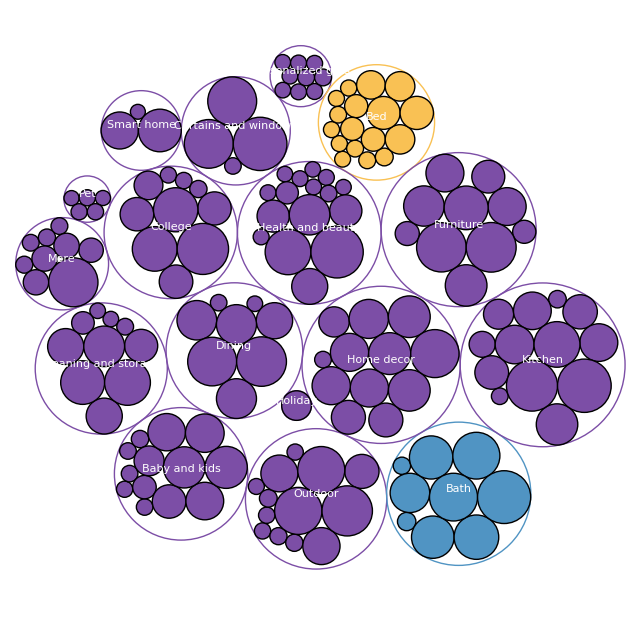

In [5]:
# Read the data from a csv file
df = pd.read_csv("bbb.csv")

# Group the data by category and sum the values
df_grouped = df.groupby("category")["value"].sum().reset_index()

# Create a list of dictionaries for the multilevel circlify input
data = []
bath_ids=[]
bed_ids=[]
circles_dict=[]
for cat, val in zip(df_grouped["category"], df_grouped["value"]):
    # Filter the data for each category
    df_cat = df[df["category"] == cat]
    # Create a list of subcircles for each entity
    subcircles = [{"id": ent, "datum": val} for ent, val in zip(df_cat.index, df_cat["value"])]
    # Create a dictionary for each category with its value and subcircles
    data.append({"id": cat, "datum": val, "children": subcircles})

bath_ids=[]
bed_ids=[]

# Use circlify to compute the positions and radii of the circles
circles = circ.circlify(data, show_enclosure=False, target_enclosure=circ.Circle(x=0, y=0, r=1),)
# Plot the circles using matplotlib
fig, ax = plt.subplots(figsize=(8.0, 8.0))
ax.axis("off")
# Loop over the circles and draw them
for circle in circles:
    # Get the id, x, y, and r of each circle
    label=''
    
    if(circle.ex is not None):
        label = circle.ex['id']
        if label=='Bed':
            bed_ids=[d['id'] for d in circle.ex['children']]
            color=bed_color
        elif label=='Bath':
            bath_ids=[d['id'] for d in circle.ex['children']]
            color=bath_color
        elif label in bed_ids:
            color=bed_color
        elif label in bath_ids:
            color=bath_color
        else :
            color=default_color

    level=circle.level
    x = circle.x
    y = circle.y
    r = circle.r

    # Draw the circle
    if level==2:
        # If the label contains a dot, it is a subcircle (entity)
        # Fill it with purple and give it a black edge
        ax.add_patch(plt.Circle((x, y), r, color=color, ec="black"))
    else:
        # If the label does not contain a dot, it is a main circle (category)
        # Give it a purple edge and no fill
        ax.add_patch(plt.Circle((x, y), r, fill=False, ec=color))
        # Add the label above the circle
        ax.text(x, y, label, ha="center", va="bottom", fontsize=8,color='white')
lim=1
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
# Show the plot
plt.show()




Adjust your packed circle chart  to look like the original image from the CNN article. An example is below.

![example_2](images/example_2.png)

The exact placement of items within each category do not need to be exactly as in the original image, but the categories themselves (enclosing circles) should be positioned correctly. Elements that should be present in your final submission include:

- each category is positioned like the original image,
- the items within a category do not have an edge colour,
- the enclosing circle for each category is grey in colour,
- the label for each category is above its enclosing circle, and
- the text ' ... AND BEYOND' is present, rotated 20 degrees, and positioned correctly.

For Bonus you can change the design : text is curved around each circle like in the original image. (The four items that are specifically annotated in the original image, e .. g, 'Fire pits', are not included in the data set, so no bonus marks for adding them.)

In [6]:
def move(id,dx,dy,ax,circles):
    # if(id==64):print("ah")
    circle=None
    for c in circles:
        if(c.ex is not None):
            if c.ex['id']==id:
                 circle=c
                 break
                
    
    # Get the id, x, y, and r of each circle
    label=''
    


    level=circle.level
    x = circle.x
    y = circle.y
    r = circle.r
    # path=''
    # text=''
    if(circle.ex is not None):
        label = circle.ex['id']

        for dic in circles_dict:
            # print(dic)
            id,p,t=dic
            # p=pt.Path.circle(p)
            # print(p)
            if id==label:
                
                path=p
                text=t
                break
 
         
    # print(text)
            
    # Draw the circle
    if level==2:
        # If the label contains a dot, it is a subcircle (entity)

        # get the current positions of the Path and Text objects
       
        path_x, path_y = path.center
        # print(path_x,dx)

        # calculate the new positions by adding dx and dy
        new_path_x = path_x + dx
        new_path_y = path_y + dy
        
        # set the new positions using the set_position method
        path.center=(new_path_x, new_path_y)
        
        
    else:
         # If the label does not contain a dot, it is a main circle (category)

        # Fill it with purple and give it a black edge
        path_x, path_y = path.center
        text_x, text_y = text.get_position()
        new_text_x = text_x + dx
        new_text_y = text_y + dy
        # calculate the new positions by adding dx and dy
        new_path_x = path_x + dx
        new_path_y = path_y + dy

        # set the new positions using the set_position method
        path.center=(new_path_x, new_path_y)
        text.set_position((new_text_x, new_text_y)) 





        childeren=circle.ex['children']
        for child in childeren:
   
                         move(child['id'],dx,dy,ax,circles)
        plt.sca(ax)
        plt.show()

    


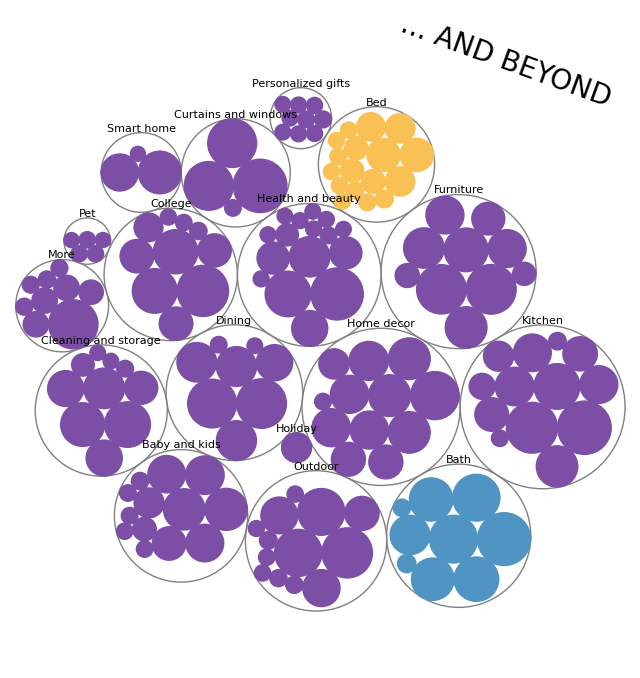

In [7]:
# Use circlify to compute the positions and radii of the circles
circles = circ.circlify(data, show_enclosure=False, target_enclosure=circ.Circle(x=0, y=0, r=1),)
# pp(circles)
# Plot the circles using matplotlib
fig, ax = plt.subplots(figsize=(8.0, 8.0))
ax.axis("off")
ax.set_title("... AND BEYOND", fontsize=20, rotation=-20, x=0.8, y=0.9)
# Loop over the circles and draw them
for circle in circles:
    # Get the id, x, y, and r of each circle
    label=''
    
    if(circle.ex is not None):
        label = circle.ex['id']
        if label=='Bed':
            bed_ids=[d['id'] for d in circle.ex['children']]
            color=bed_color
        elif label=='Bath':
            bath_ids=[d['id'] for d in circle.ex['children']]
            color=bath_color
        elif label in bed_ids:
            color=bed_color
        elif label in bath_ids:
            color=bath_color
        else :
            color=default_color

    level=circle.level
    x = circle.x
    y = circle.y
    r = circle.r

    # Draw the circle
    if level==2:
        # If the label contains a dot, it is a subcircle (entity)
        # Fill it with purple and give it a black edge
        p=ax.add_patch(plt.Circle((x, y), r, color=color))
        # print(p)
        t=None
    else:
        # If the label does not contain a dot, it is a main circle (category)
        # Give it a purple edge and no fill
        p=ax.add_patch(plt.Circle((x, y), r,fill=False, ec='grey'))
        # print(p)

        
        
        # Add the label above the circle
        t=ax.text(x, y+r, label, ha="center", va="bottom", fontsize=8,color='black')
    circles_dict.append([label,p,t])
lim=1
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
# Show the plot
plt.sca(ax)
plt.show()




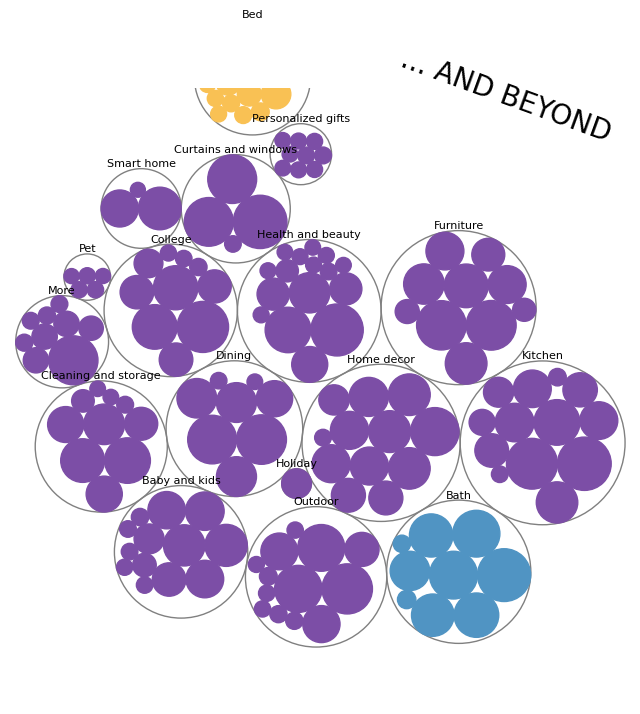

In [8]:
move('Bed',-0.4,0.4,ax,circles)